In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import re


In [47]:
#THUẬT TOÁN CROP HEURISTIC

def crop(img):

    top, bottom, left, right = get_boundaries(img)
    return img[top:bottom, left:right]

def get_boundaries(img):
    """
    return bbox in form [y_min, y_max, x_min, x_max]
    """
    mask = img != 0
    bounds = []
    for ax in [1,0]:
        region = mask.any(axis=ax)
        bounds.append((region.argmax(), mask.shape[1-ax] - region[::-1].argmax()))
    return [bounds[0][0], bounds[0][1], bounds[1][0], bounds[1][1]]

In [9]:
list_studies = os.listdir("/media/tungthanhlee/DATA/multi_view_mammo_classification/images")
imgs = []
for study in list_studies[:5]:
    study_path = os.path.join("/media/tungthanhlee/DATA/multi_view_mammo_classification/images", study)
    img_list = os.listdir(study_path)
    for img in img_list:
        imgs.append(os.path.join(study_path,img))

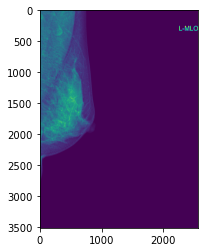

True

In [53]:
def image_preprocessing(im):
  Rimg = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
  return np.array(Rimg).astype(np.uint8)

#ex3860
img_vis = image_preprocessing("/media/tungthanhlee/DATA/multi_view_mammo_classification/images/1.2.410.200010.1081101.5040.621781.631228.631228/1.3.12.2.1107.5.12.7.5054.30000019071200290132800001440.png")
img_vis = crop(img_vis)
plt.imshow(img_vis)
plt.show()
cv2.imwrite("/home/tungthanhlee/mammo/sam/1.3.12.2.1107.5.12.7.5054.30000019071200290132800001440.png",img_vis)


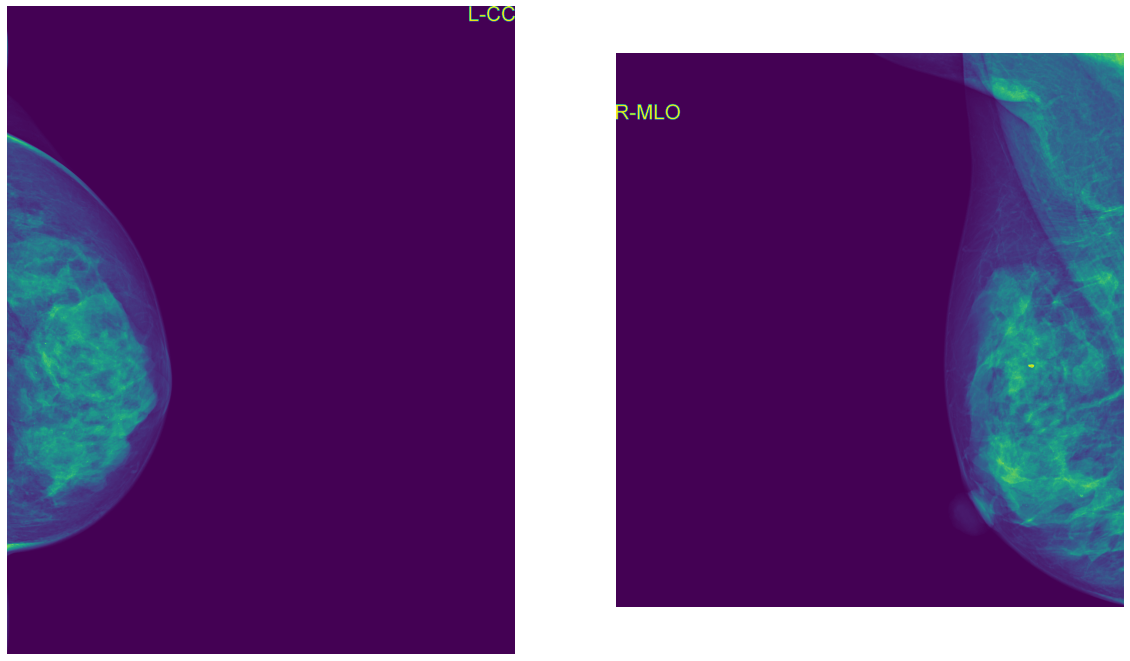

In [18]:
def image_preprocessing(im):
  Rimg = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
  return np.array(Rimg).astype(np.uint8)

import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20, 20))

columns = 2
rows = 1
for i in range(1, columns*rows +1):
    img = image_preprocessing(imgs[i])
    crop_img = crop(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.imshow(crop_img)
    plt.axis('off')

plt.show()

In [6]:
#THUẬT TOÁN CROP BẰNG CÁCH DETECT MAMMO

#Trích xuất bounding box từ fordel detect mammo Yolo5
list_boud_folder = os.listdir("/home/single1/BACKUP/SamHUyen/mammo/sam/yolov5/yolov5/runs/detect/")
list_bounding_box = []
counttxt = 0
for fold in tqdm(list_boud_folder):
    bound_path = "/home/single1/BACKUP/SamHUyen/mammo/sam/yolov5/yolov5/runs/detect/" + fold + "/labels/"
    for bound in os.listdir(bound_path):
        boundbox_path = os.path.join(bound_path,bound)
        counttxt+=1
        if len(read_bound_txt(boundbox_path)) != 0:
            list_bounding_box.append(boundbox_path + " | " + str(read_bound_txt(boundbox_path)[0]))
        else:
            print(boundbox_path)

print("count ", counttxt)
#print (list_bounding_box)

100%|██████████| 3835/3835 [00:00<00:00, 5783.92it/s]count  15344



In [10]:
#Check xem file image nao chua duoc predict

list_studies = os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images")
studies = []
df = pd.read_csv("/home/single1/BACKUP/SamHUyen/mammo/sam/singleview_sam/updatedcsv_singleview.csv")
#txts = []
countimg = 0 
for study in list_studies:
    study_path = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images", study)
    if study not in df["study_id"].values:
        studies.append(study_path)
        countimg = countimg +  len(os.listdir(study_path))
print("Number studies of new dataset: ", len(studies))
print("NUmber images of new dataset: ", countimg)

Number studies of new dataset:  3835
NUmber images of new dataset:  15380


In [27]:
#check so anh unique trong tap dataset
img = []
test = pd.DataFrame()
for std in studies:
    for im in os.listdir(std):
        img.append(im)
print(len(img))
print(img[0])
test["img_id"] = img
print("number unique img: ", test["img_id"].nunique())

15380
1.3.12.2.1107.5.12.7.5054.30000019061100333007800000772.png
number unique img:  15380


In [17]:
#check 
list_boud_folder = os.listdir("/home/single1/BACKUP/SamHUyen/mammo/sam/yolov5/yolov5/runs/detect/")
list_bounding_box = []
counttxt = 0
for fold in tqdm(list_boud_folder):
    bound_path = "/home/single1/BACKUP/SamHUyen/mammo/sam/yolov5/yolov5/runs/detect/" + fold + "/labels/"
    for bound in os.listdir(bound_path):
        list_bounding_box.append(bound.replace(".txt",".png"))


print("\n number of file txt: ",len(list_bounding_box))

100%|██████████| 3835/3835 [00:00<00:00, 139354.70it/s]
 number of file txt:  15344



In [25]:
#check unique
test = pd.DataFrame()
test["txt_id"] = list_bounding_box
print("Number of unique txt: ", test["txt_id"].nunique())
list_unique_txt = test["txt_id"].unique()

Number of unique txt:  13778


In [30]:
miss_img = []
for im in img:
    if im not in list_unique_txt:
        miss_img.append(im)
print(len(miss_img)) #15380 - 13778

1602


In [32]:
#get path miss img
list_studies = os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images")
miss_img_path = []
for study in tqdm(list_studies):
    study_path = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images", study)
    for im in os.listdir(study_path):
        if im in miss_img:
            miss_img_path.append(os.path.join(study_path, im))

len(miss_img_path)

100%|██████████| 8652/8652 [00:00<00:00, 9331.37it/s]


1602

In [34]:
#copy qua thu muc khac de predict nhanh hon
import shutil
miss_des_path = "/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/miss_img/"
for im in tqdm(miss_img_path):
    shutil.copy(im, miss_des_path)

len(os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/miss_img/"))


100%|██████████| 1602/1602 [00:11<00:00, 138.86it/s]


1602

In [2]:
#Lưu bounding box từ fordel detect mammo Yolo5 sang /home/tungthanhlee/mammo/sam/labelstxt
import shutil
from tqdm import tqdm

list_boud_folder = os.listdir("/home/single1/BACKUP/SamHUyen/mammo/sam/yolov5/yolov5/runs/detect/")
des_folder = "/home/single1/BACKUP/SamHUyen/mammo/sam/labeltxt2/"
for fold in tqdm(list_boud_folder):
    bound_path = "/home/single1/BACKUP/SamHUyen/mammo/sam/yolov5/yolov5/runs/detect/" + fold + "/labels/"
    for bound in os.listdir(bound_path):
        label_path = os.path.join(bound_path, bound)
        shutil.copy(label_path, des_folder)

len(os.listdir("/home/single1/BACKUP/SamHUyen/mammo/sam/labeltxt2")) #20020


100%|██████████| 1596/1596 [00:00<00:00, 15052.51it/s]


15374

In [12]:
#tao cac folder trong crop-images:
os.chdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images")
df = pd.read_csv("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/csv/holdout.csv")
for std in tqdm(df["study_id"].unique()):
    os.mkdir(std)

len(os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images")) #train : 5955, test: 1277, hold_out: 1277

100%|██████████| 1277/1277 [00:00<00:00, 82241.25it/s]


8509

In [6]:
#Chuyển file txt sang thư mục "/media/tungthanhlee/DATA/multi_view_mammo_classification/crop_images_txt"
txtfiles = os.listdir("/home/tungthanhlee/mammo/sam/labelstxt/")
for txt in tqdm(txtfiles):
    txt_path = os.path.join("/home/tungthanhlee/mammo/sam/labelstxt/",txt)
    shutil.copy(txt_path, "/media/tungthanhlee/DATA/multi_view_mammo_classification/crop_images_txt")

100%|██████████| 20251/20251 [00:11<00:00, 1693.04it/s]


In [4]:
#THUẬT TOÁN CROP BẰNG CÁCH DETECT MAMMO

#Trích xuất bounding box từ fordel detect mammo Yolo5
list_boud_folder = os.listdir("/home/single1/BACKUP/SamHUyen/mammo/sam/labeltxt2")
list_bounding_box = []
for bound in tqdm(list_boud_folder):
    boundbox_path = os.path.join("/home/single1/BACKUP/SamHUyen/mammo/sam/labeltxt2",bound)
    if len(read_bound_txt(boundbox_path)) != 0:
        list_bounding_box.append(boundbox_path + " | " + str(read_bound_txt(boundbox_path)[-1]))
    else:
        print(boundbox_path)

100%|██████████| 15374/15374 [00:00<00:00, 28470.31it/s]


In [3]:
#function to read file
def read_bound_txt(boundbox_path):
    file = open(boundbox_path, 'r')
    boundbox = []
    for line in file:
        boundbox.append(line)
    return boundbox

In [5]:
bound_df = pd.DataFrame()
bound_df["sumary"] = list_bounding_box
bound_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15374 entries, 0 to 15373
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sumary  15374 non-null  object
dtypes: object(1)
memory usage: 120.2+ KB


In [6]:
bound_df = bound_df["sumary"].str.split(expand=True)

In [7]:
bound_df.head(5)

,0,1,2,3,4,5,6
0,/home/single1/BACKUP/SamHUyen/mammo/sam/labelt...,|,0,0.827143,0.424531,0.345714,0.825753
1,/home/single1/BACKUP/SamHUyen/mammo/sam/labelt...,|,0,0.180179,0.379619,0.358214,0.725128
2,/home/single1/BACKUP/SamHUyen/mammo/sam/labelt...,|,0,0.838036,0.487919,0.303214,0.702388
3,/home/single1/BACKUP/SamHUyen/mammo/sam/labelt...,|,0,0.18875,0.410603,0.376071,0.821205
4,/home/single1/BACKUP/SamHUyen/mammo/sam/labelt...,|,0,0.860179,0.336271,0.261071,0.644684


In [8]:
image_id = bound_df[0].str.split(pat="/", expand=True)
image_id.head(5)

,0,1,2,3,4,5,6,7,8
0,,home,single1,BACKUP,SamHUyen,mammo,sam,labeltxt2,1.3.12.2.1107.5.12.7.5054.30000018082000425475...
1,,home,single1,BACKUP,SamHUyen,mammo,sam,labeltxt2,1.3.12.2.1107.5.12.7.5054.30000019051600203351...
2,,home,single1,BACKUP,SamHUyen,mammo,sam,labeltxt2,1.3.12.2.1107.5.12.7.5054.30000019012200450089...
3,,home,single1,BACKUP,SamHUyen,mammo,sam,labeltxt2,1.3.12.2.1107.5.12.7.5054.30000018121500523176...
4,,home,single1,BACKUP,SamHUyen,mammo,sam,labeltxt2,1.3.12.2.1107.5.12.7.5054.30000019051400241381...


In [9]:
#KHẢO SÁT SHAPE IMAGES:
from tqdm import tqdm

list_studies = os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images")
imgs_noise = []
for study in tqdm(list_studies):
    study_path = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images", study)
    img_list = os.listdir(study_path)
    for img in img_list:
        if img.find("png") > 0:
            img_path = os.path.join(study_path,img)
            #print(img_path)
            image = cv2.imread(img_path)
            if (image.shape[0] != 3518) or (image.shape[1] != 2800):
                imgs_noise.append(img_path)
print (len(imgs_noise))

100%|██████████| 8652/8652 [23:44<00:00,  6.08it/s]37



In [10]:
print (len(imgs_noise))
print(imgs_noise[:5])
#path_ms_img = pd.DataFrame()
#path_ms_img["path"] = imgs_noise
#path_ms_img.info()
#path_ms_img.to_csv("/home/tungthanhlee/mammo/sam/path_ms_img.csv")

37
['/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images/1.2.410.200010.1064927.6631.531586.540038.540038/1.3.12.2.1107.5.12.7.5054.30000019060300241728100000028.png', '/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images/1.2.410.200010.1094344.8678.280401.284949.284949/1.3.12.2.1107.5.12.7.5054.30000019011000353568700000472.png', '/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images/1.2.410.200010.1154120.1522.35896.36751.36751/1.3.12.2.1107.5.12.7.5054.30000018090500515176500001009.png', '/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images/1.2.410.200010.1082517.4108.239513.243516.243516/1.3.12.2.1107.5.12.7.5054.30000018121400451660900000232.png', '/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images/1.2.410.200010.1082725.829.624141.633599.633599/1.3.12.2.1107.5.12.7.5054.30000019071500223231200000316.png']


In [ ]:
#remove nan
for im in imgs_noise:
    print(im)
    img = cv2.imread(im)
    #if img.shape[0] == 1458:
    #    os.remove(im)
    #plt.imshow(img)
    print (img.shape) #(3318, 2658, 3)
plt.show()

In [19]:
#return bounding box format from yolo to normal 
def normalize_boundingbox(x,y,width, height):
  rate = 3072/256
  x_min = x*rate
  x_max = x*rate + width*rate
  y_min = y*rate
  y_max = y*rate + height*rate
  return x_min, x_max, y_min, y_max

In [21]:
bound_box_df = pd.DataFrame()
bound_box_df["image_id"] = image_id[8].str.replace(".txt",".png")
bound_box_df["x_center"] = bound_df[3]
bound_box_df["y_center"] = bound_df[4]
bound_box_df["width"] = bound_df[5]
bound_box_df["height"] = bound_df[6]
bound_box_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15374 entries, 0 to 15373
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  15374 non-null  object
 1   x_center  15374 non-null  object
 2   y_center  15374 non-null  object
 3   width     15374 non-null  object
 4   height    15374 non-null  object
dtypes: object(5)
memory usage: 600.7+ KB


In [22]:
bound_box_df.head(5)

,image_id,x_center,y_center,width,height
0,1.3.12.2.1107.5.12.7.5054.30000018082000425475...,0.827143,0.424531,0.345714,0.825753
1,1.3.12.2.1107.5.12.7.5054.30000019051600203351...,0.180179,0.379619,0.358214,0.725128
2,1.3.12.2.1107.5.12.7.5054.30000019012200450089...,0.838036,0.487919,0.303214,0.702388
3,1.3.12.2.1107.5.12.7.5054.30000018121500523176...,0.18875,0.410603,0.376071,0.821205
4,1.3.12.2.1107.5.12.7.5054.30000019051400241381...,0.860179,0.336271,0.261071,0.644684


In [24]:
bound_box_df.to_csv("/home/single1/BACKUP/SamHUyen/mammo/sam/new_bound_box_df.csv")

In [81]:
# height = 3518, width = 2800

x_max = int((0.163214*2800*2 + 0.321429*2800)/2)
x_min = int(np.abs(x_max-0.321429*2800))
y_max = int((0.347783*3518*2 + 0.679648*3518)/2)
y_min = int(np.abs(y_max-0.679648*3518))

print(x_max,x_min,y_max, y_min )



906 5 2419 27


In [25]:
def comp_image(x_center,y_center,width,height):
    img_width = 2800
    img_height = 3518
    x_max = int((x_center*img_width*2 + width*img_width)/2)
    x_min = int(np.abs(x_max-width*img_width))
    y_max = int((y_center*img_height*2 + height*img_height)/2)
    y_min = int(np.abs(y_max-height*img_height))
    return x_max,x_min,y_max, y_min

In [26]:
def crop_image(img,x_max,x_min,y_max, y_min):
    image = cv2.imread(img)
    x1 = max(0,x_min-50)
    x2 = min(image.shape[1], x_max+50)
    y1 = max(0, y_min-50)
    y2 = min(image.shape[0], y_max+50)
    return image[y1:y2, x1:x2 ,:]

(3518, 2800, 3)


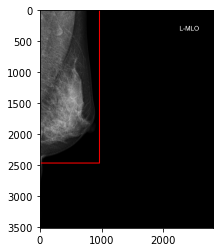

In [82]:
img = cv2.imread("/media/tungthanhlee/DATA/multi_view_mammo_classification/images/1.2.410.200010.1081101.5040.621781.631228.631228/1.3.12.2.1107.5.12.7.5054.30000019071200290132800001440.png")
#cv2.retangle(img, startpoint, endpoint, color, thickness)
img = cv2.rectangle(img, (x_min-50,y_min-50), (x_max+50,y_max+50), (255,0,0), 15)
print(img.shape)
plt.imshow(img)

(2469, 956, 3)


True

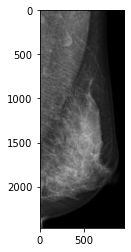

In [83]:
img_crop = crop_image("/media/tungthanhlee/DATA/multi_view_mammo_classification/images/1.2.410.200010.1081101.5040.621781.631228.631228/1.3.12.2.1107.5.12.7.5054.30000019071200290132800001440.png",x_max,x_min,y_max, y_min)
print(img_crop.shape)
plt.imshow(img_crop)
cv2.imwrite("/home/tungthanhlee/mammo/sam/crop_1.3.12.2.1107.5.12.7.5054.30000019071200290132800001440.png",img_crop )

In [ ]:
#yolo data normalize
        x_center = ((x_p1 + x_p2)/2)/width
        y_center = ((y_p1 + y_p2)/2)/height
        width = (np.abs(x_p1 - x_p2))/widthim
        height = (np.abs(y_p1 - y_p2))/heightim

        

In [27]:
#CUT IMAGES PROCESS
from tqdm import tqdm
#bound_box_df = pd.read_csv("/home/tungthanhlee/mammo/sam/bound_box_df.csv")
num_img = 0
list_studies = os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images")
crop_img_folder = "/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images"
#mis_img = [] #images bị mis khi detect
for study in tqdm(list_studies):
    study_path = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images", study)
    crop_path = os.path.join(crop_img_folder, study)
    img_list = os.listdir(study_path)
    num_img = num_img+len(img_list)
    for img in img_list:
        if img.find("png") > 0:
            #Check xem img có trong img_id detect không ?
            if img in bound_box_df["image_id"].values: 
                #get x_center,y_center
                
                x_center = float(bound_box_df[bound_box_df["image_id"]==img]["x_center"].values[0])
                y_center = float(bound_box_df[bound_box_df["image_id"]==img]["y_center"].values[0])
                width = float(bound_box_df[bound_box_df["image_id"]==img]["width"].values[0])
                height = float(bound_box_df[bound_box_df["image_id"]==img]["height"].values[0])
                x_max,x_min,y_max, y_min = comp_image(x_center,y_center,width,height)

                #get img
                img_path = os.path.join(study_path,img)
                #print(img_path)
                #image = cv2.imread(img_path)
                #crop img
                crop_img = crop_image(img_path, x_max,x_min,y_max, y_min)
                
                #save crop img
                crop_img_path = os.path.join(crop_path,img )
                cv2.imwrite(crop_img_path,crop_img)

            #else:
                #mis_img.append(os.path.join(study_path,img))


#print(num_img)


100%|██████████| 8652/8652 [30:10<00:00,  4.78it/s]


In [4]:
#check empty folder
check_empty_folder = 0
for std in os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images"):
    std_path = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images",std)
    if len(os.listdir(std_path)) == 0:
        check_empty_folder+=1
print(check_empty_folder)

0


In [42]:
#chuyển ảnh crop sang floder mới
import shutil

df = pd.read_csv("/home/single1/BACKUP/SamHUyen/mammo/sam/updatedcsv_singleview.csv")
dropimg = []
for img in tqdm(os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/crop-images/crop_images")):
    if img.replace(".png","") in df["image_id"].values:
        std = df[df["image_id"] == img.replace(".png","")]["study_id"].values[0]
        despath = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images",)
        imgpath = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/crop-images/crop_images",img)
        shutil.copy(imgpath, despath)
    else:
        dropimg.append(os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/crop-images/crop_images",img))
        

[10:10<04:04,  4.19it/s]

 95%|█████████▍| 19226/20250 [10:10<03:36,  4.74it/s]

 95%|█████████▍| 19227/20250 [10:11<03:55,  4.34it/s]

 95%|█████████▍| 19229/20250 [10:11<03:02,  5.60it/s]

 95%|█████████▍| 19230/20250 [10:11<02:53,  5.87it/s]

 95%|█████████▍| 19231/20250 [10:11<02:44,  6.20it/s]

 95%|█████████▍| 19232/20250 [10:11<02:45,  6.14it/s]

 95%|█████████▍| 19233/20250 [10:11<02:39,  6.38it/s]

 95%|█████████▍| 19234/20250 [10:12<02:25,  6.96it/s]

 95%|█████████▍| 19235/20250 [10:12<02:37,  6.43it/s]

 95%|█████████▍| 19236/20250 [10:12<02:42,  6.23it/s]

 95%|█████████▍| 19237/20250 [10:12<03:07,  5.41it/s]

 95%|█████████▌| 19238/20250 [10:12<03:08,  5.38it/s]

 95%|█████████▌| 19240/20250 [10:12<02:29,  6.78it/s]

 95%|█████████▌| 19241/20250 [10:13<02:49,  5.95it/s]

 95%|█████████▌| 19243/20250 [10:13<02:42,  6.19it/s]

 95%|█████████▌| 19244/20250 [10:13<02:55,  5.74it/s]

 95%|█████████▌| 19245/20250 [10:13<02:42,  6.19it/s]

 95%|█████████▌| 19246/20250 [10:14<03:

In [7]:
df = pd.read_csv("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/csv/holdout.csv")
df["image_id"].nunique() # train: 23820 imgs + 5108 imgs + 5108imgs = 34036 imgs

5108

In [2]:
#check number of crop imgs
check_crop_img = 0
for std in os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images"):
    std_path = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images",std)
    check_crop_img += len(os.listdir(std_path)) 
print(check_crop_img)

34064


In [3]:
#print(len(mis_img))
#check xem ảnh crop và ảnh full thiếu thế nào
import pandas as pd
traindf = pd.read_csv("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/csv/train.csv")
validdf = pd.read_csv("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/csv/valid.csv")
holdoutdf = pd.read_csv("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/csv/holdout.csv")

df = pd.concat((traindf, validdf), axis = 0)
df = pd.concat((df,holdoutdf), axis=0)
print("NUmber of image_id ", df["image_id"].nunique())
lis_imgid = df["image_id"].unique()

NUmber of image_id  34036


In [4]:
list_yolo = os.listdir("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images")
NumImg = 0
list_yolo_img = []
for std in list_yolo:
    studies = os.path.join("/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/crop-images",std)
    NumImg += len(os.listdir(studies))
    for im in os.listdir(studies):
        list_yolo_img.append(im.replace(".png",""))
print(NumImg)
print(len(list_yolo_img))
print(list_yolo_img[:2])


34064
34064
['1.3.12.2.1107.5.12.7.5054.30000020011500503134300000263', '1.3.12.2.1107.5.12.7.5054.30000020011500503134300000259']


In [5]:
miss_img = []
for im in lis_imgid:
    if im not in list_yolo_img:
        miss_img.append(im)
len(miss_img)

1

In [7]:
#copy miss img to crop_images folder to detect mammo
import shutil

for im in miss_img:
    path = "/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/updatedata/images/" + df[df["image_id"]==im]["study_id"].values[0] + "/" + im + ".png"
    shutil.copy(path,"/home/single1/BACKUP/SamHUyen/multi_view_mammo_classification/crop-images")
    

In [6]:
34023+42

34065

In [8]:
df[df["image_id"]=="1.3.12.2.1107.5.12.7.5054.30000018111600381179600000843"]

,study_id,image_id,position,laterality,birad,density
18220,1.3.12.2.1107.5.12.7.5054.30000018111600381165...,1.3.12.2.1107.5.12.7.5054.30000018111600381179...,CC,R,BI-RADS 1,DENSITY-C
